In [1]:
import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()) + "/stella"))
from dotenv import load_dotenv

load_dotenv()
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = os.getenv("OPEN_AI_API_KEY")

In [2]:
from stella.services.srag import app

/Users/peerasit/senior_project/STELLA-Backend/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[CORE] Initializing Milvus Database Core...
[DB] init Embedding Model...
[DB] init Embedding Model Successfully.
[DB] Found Database: stella_vector_db


In [3]:
app.invoke({"question": "สวัสดี", "session_id": ""})

Classify question
Classify: Generate
Generate
[]
สวัสดีค่ะ! มีอะไรให้ช่วยไหมคะ?
Check Hallucination


{'question': 'สวัสดี',
 'input_question': 'สวัสดี',
 'generation': 'สวัสดีค่ะ! มีอะไรให้ช่วยไหมคะ?',
 'documents': [],
 'session_id': '',
 'counter': 0}

## Dataset

In [14]:
questions = [
    "What is bts?",
    "What is ba",
    "การดำเนินธรุรกิจของ bts",
    # "What are the primary business operations of Bangkok Airways?",
    # "มาตราฐาน ndc ในไทย",
    # "รายได้ของ bts เทียบกับ scb อันได้กำไร",
    # "gri คือ",
    # "มาตราฐาน ndc ในประเทศไทย",
    # "bts มีการดำเนินนโยบายตามแนวทาง gri ยังไงบ้าง"
]

ground_truths = [
    "บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)",
    "บริษัท การบินกรุงเทพ จำกัด (มหาชน)",
    "MOVE, MIX, MATCH",
    # "Airline operations, airport business, and related services",
    # "แผนพัฒนากำลังผลิตไฟฟ้า (Power Development Plan) 2015-2036",
    # "42,249,827.61, 150,342,049.00, 31,194,500.54, 154,420,335.00",
    # "Global Reporting Initiative",
    # "มีการกำหนดเป้าหมายและแผนการดำเนินงานที่เกี่ยวข้องกับการลดการปล่อยก๊าซเรือนกระจก",
    # "มีการจัดทำรายงานความยั่งยืนที่อ้างอิงมาตรฐาน GRI Standards ซึ่งเป็นหนึ่งในมาตรฐานการเปิดเผยข้อมูลด้านความยั่งยืนที่บริษัทใช้"
]

# questions = [
#     "What is the registered company name of BTS Group Holdings?",
#     "What is the registered company name of Bangkok Airways?",
#     "What are the primary business operations of BTS Group Holdings?",
#     "What are the primary business operations of Bangkok Airways?",
#     "What was BTS’s total revenue in 2023?",
#     "What was BA’s total revenue in 2023?",
#     "Compare the percentage of revenue from domestic vs. international sources for BTS and BA in 2023.",
#     "Which company had a higher revenue growth rate from 2022 to 2023?",
#     "What percentage of BTS’s revenue came from the MOVE segment in 2023?",
#     "What percentage of BA’s revenue came from airline operations in 2023?",
#     "Which company had a more diversified revenue stream?",
#     "How much electricity did BTS consume in 2023?",
#     "How much electricity did BA consume in 2023?",
#     "Which company had higher CO₂ emissions in 2023?",
#     "What was the total water consumption of BTS in 2023?",
#     "What was the total water consumption of BA in 2023?",
#     "What was the total number of employees in BTS in 2023?",
#     "What was the total number of employees in BA in 2023?",
#     "What was the total compensation paid to BTS employees in 2023?",
#     "What was the total compensation paid to BA employees in 2023?",
#     "Which company had a higher voluntary turnover rate in 2023?",
#     "How many board members does BTS have?",
#     "How many board members does BA have?",
#     "What percentage of BTS’s board members are independent directors?",
#     "What percentage of BA’s board members are independent directors?",
#     "What are the top three strategic risks faced by BTS?",
#     "What are the top three strategic risks faced by BA?",
#     "How many total shares were issued by BTS?",
#     "How many total shares were issued by BA?",
#     "Compare the financial risk exposure of BTS and BA in terms of currency exchange rate volatility."
# ]


# ground_truths = [
#     "บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)",
#     "บริษัท การบินกรุงเทพ จำกัด (มหาชน)",
#     "Mass transit, advertising, and business partnerships (MOVE, MIX, MATCH)",
#     "Airline operations, airport business, and related services",
#     "24,138,715.99 thousand THB",
#     "21,732,513.00 thousand THB",
#     "BTS: Domestic: 100%, International: 0% | BA: Domestic: 71.52%, International: 28.48%",
#     "BA had a higher growth rate (from 12,742,078 to 21,732,513), whereas BTS had a decline (from 31,194,500.54 to 24,138,715.99).",
#     "50.93%",
#     "68.91%",
#     "BTS (MOVE, MIX, MATCH), while BA relies more on airline operations.",
#     "176,404,000 kWh",
#     "8,845,032.51 kWh",
#     "BTS: 153,249 tons | BA: 293,222 tons (Higher emissions)",
#     "199,500 cubic meters",
#     "189,189.30 cubic meters",
#     "5,880",
#     "2,291",
#     "3,360,079,885.65 THB",
#     "2,240,629,789.00 THB",
#     "BTS: 12.60% | BA: 6.77% (BTS had a higher turnover rate)",
#     "12",
#     "11",
#     "50.00%",
#     "36.36%",
#     "1. Industry volatility, 2. Government policies, 3. Customer demand changes",
#     "1. Industry volatility, 2. International policies, 3. Technology changes",
#     "13,167,638,462 shares",
#     "2,100,000,000 shares",
#     "BTS has no revenue exposure to foreign exchange (100% domestic). BA has 28.48% of revenue from international sources, making it more exposed to exchange rate fluctuations."
# ]

In [15]:
contexts = []
answers = []
for i in range(0, len(questions)):
    answer = app.invoke({"question": questions[i], "session_id": ""})
    answers.append(answer["generation"])
    print("dsdsdfsfs", [c.page_content for c in answer['documents']])
    contexts.append([c.page_content for c in answer['documents']])
    print(answer)

Classify question
Classify: Extract
Retrieve:
[Grade Doc] Question: What is bts?
gri 0.7960489392280579 0.77
ndc 0.7774947285652161 0.77
LLM Decision [{'bts': ['2023']}]
LLM Search [{'bts': ['2023']}]
search ['bts', 'gri', 'ndc']


{'k': 8, 'partition_names': ['bts'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri', 'ndc']}
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bts_56-1_2023.pdf', 'company_name': 'bts', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BTS\nสถานที่ตั้งสำนักงานใหญ่ : ชั้น 14-15 อาคารทีเอสที ทาวเวอร์ เลขที่ 21 ซอยเฉยพ่วง ถนนวิภาวดี-รังสิต\nแขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : กลุ่มบริษัทที่ประกอบธุรกิจในหลากหลายอุตสาหกรรมโดยมุ่งเน้นการใช้\nประโยชน์จากการเข้าถึงข้อมูลเครือข่ายระบ

LLM Decision [{'Output': ['']}, {'ba': ['2023']}]
LLM Search [{'ba': ['2023']}]
search ['ba', 'gri', 'ndc']
{'k': 8, 'partition_names': ['ba'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri', 'ndc']}
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'ba_56-1_2023.pdf', 'company_name': 'ba', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท การบินกรุงเทพ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BA\nสถานที่ตั้งสำนักงานใหญ่ : เลขที่ 99 หมู่ที่ 14 ถนนวิภาวดีรังสิต แขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : บริษัทประกอบธุรกิจสายการบิน ธุรกิจสนามบิน และธุรกิจที่เกี่ยวข้องกับธุรกิจ\nสนามบิน ได้แก่ การให้บริการกิจการภาคพื้นดิน การให้บริการอาหารบนเที่ยว\nบิ

LLM Decision [{'bts': ['2023']}]
LLM Search [{'bts': ['2023']}]
search ['bts', 'gri']
{'k': 8, 'partition_names': ['bts'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri']}
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: bts มีบริษัทในเครือที่เกี่ยวข้องในการดำเนินธุรกิจหรือไม่?
gri 0.7746751308441162 0.77
ndc 0.7479280233383179 0.77


LLM Decision [{'bts': ['2023']}]
LLM Search [{'bts': ['2023']}]
search ['bts', 'gri']
{'k': 8, 'partition_names': ['bts'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri']}
Document Relevant
Document Not Relevant
Document Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: รูปแบบการให้บริการของ bts เป็นอย่างไร?
gri 0.784584641456604 0.77
ndc 0.7822960615158081 0.77


LLM Decision [{'bts': ['2023']}]
LLM Search [{'bts': ['2023']}]
search ['bts', 'gri', 'ndc']
{'k': 8, 'partition_names': ['bts'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri', 'ndc']}
Document Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
[Grade Doc] Question: ผลการดำเนินงานทางการเงินของ bts เป็นอย่างไรในช่วงปีที่ผ่านมา?
gri 0.7853926420211792 0.77
ndc 0.750665009021759 0.77


LLM Decision [{'bts': ['2023']}]
LLM Search [{'bts': ['2023']}]
search ['bts', 'gri']
{'k': 8, 'partition_names': ['bts'], 'expr': 'metadata["year"] == "2023"'}


{'k': 4, 'partition_names': ['gri']}
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
Document Not Relevant
CONTEXT: [Document(metadata={'file_name': 'bts_56-1_2023.pdf', 'company_name': 'bts', 'file_type': '56-1', 'year': '2023', 'structured': True, 'section': 'โครงสร้างและการดำเนินงานของกลุ่มบริษัท', 'sub_section': 'นโยบายและภาพรวมการประกอบธุรกิจ (1.1)'}, page_content='นโยบายและภาพรวมการประกอบธุรกิจ (1.1)\nข้อมูลทั่วไปของบริษัท (1.1.5)\nชื่อบริษัท : บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน)\nชื่อย่อหลักทรัพย์ : BTS\nสถานที่ตั้งสำนักงานใหญ่ : ชั้น 14-15 อาคารทีเอสที ทาวเวอร์ เลขที่ 21 ซอยเฉยพ่วง ถนนวิภาวดี-รังสิต\nแขวงจอมพล เขตจตุจักร\nจังหวัด : กรุงเทพ\nรหัสไปรษณีย์ : 10900\nประเภทธุรกิจ : กลุ่มบริษัทที่ประกอบธุรกิจในหลากหลายอุตสาหกรรมโดยมุ่งเน้นการใช้\nประโยชน์จากการเข้าถึงข้อมูลเครือข่ายระบบขนส่งมวลชนและสื่อโฆษ

In [16]:
from datasets import Dataset

qagc_list = []

for i in range(0, len(contexts)):
    qagc_list.append({
        "question" : questions[i],
        "answer" : answers[i],
        "contexts" : contexts[i],
        "ground_truth" : ground_truths[i]
    })


eval_dataset = Dataset.from_list(qagc_list)
eval_dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 3
})

## Evaluation with RAGAS

In [17]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)

from ragas import evaluate

result = evaluate(
    eval_dataset,
    metrics=[
    # retrieval
        context_precision,
        context_recall,
    # generation
        faithfulness,
        answer_relevancy,
    ],
)

Evaluating: 100%|██████████| 12/12 [00:26<00:00,  2.23s/it]


In [18]:
result

{'context_precision': 0.9444, 'context_recall': 1.0000, 'faithfulness': 0.8274, 'answer_relevancy': 0.8330}

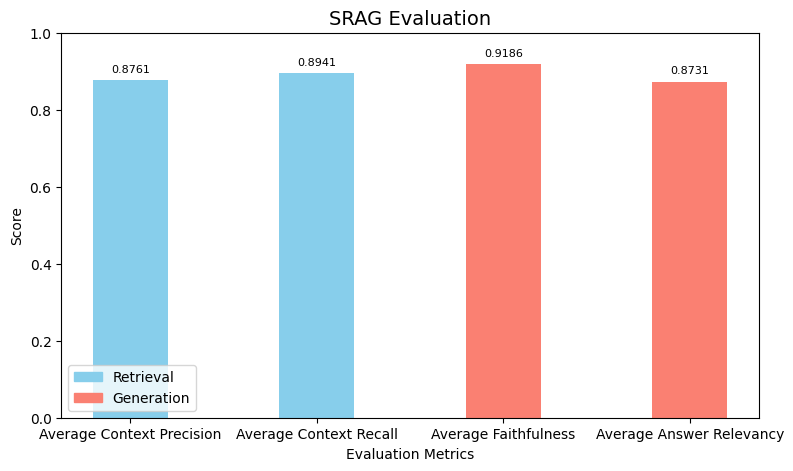

In [24]:
import matplotlib.pyplot as plt

metrics = ["Average Context Precision", "Average Context Recall", "Average Faithfulness", "Average Answer Relevancy"]
values = [0.8761, 0.8941, 0.9186, 0.8731]

plt.figure(figsize=(9, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'skyblue', 'salmon', 'salmon'], width=0.4)

plt.ylabel("Score")
plt.xlabel("Evaluation Metrics")
plt.title("SRAG Evaluation", fontsize=14)
plt.ylim(0, 1)

plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color='skyblue', label="Retrieval"),
    plt.Rectangle((0, 0), 1, 1, color='salmon', label="Generation")
], loc="lower left")

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=8)

plt.show()